In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#  Reading an image

In [15]:
#img=cv2.imread("nature.jpg",cv2.IMREAD_GRAYSCALE)
img=cv2.imread("nature.jpg",cv2.IMREAD_COLOR)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("naturegray.jpg",img)

True

# Capturing a video

In [16]:
cap=cv2.VideoCapture(0)
fourcc=cv2.VideoWriter_fourcc(*'VID1')
out=cv2.VideoWriter("output.mp4",fourcc,20.0,(640,480))
while True:
    ret,frame=cap.read()
    #gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow("frame",frame)
    out.write(frame)
    #cv2.imshow("gray",gray)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()


# Drawing figures on an image

In [8]:
img1=cv2.imread("nature.jpg",cv2.IMREAD_COLOR)
cv2.line(img1,(0,0),(200,100),(255,0,0),3)
cv2.rectangle(img1,(20,20),(60,60),(0,255,0),1)
cv2.circle(img1,(200,200),20,(0,0,255),3)
pt=np.array([[10,10],[15,10],[25,5],[40,40],[300,30]],np.int32)
cv2.polylines(img1,[pt],True,(0,0,255),3)
cv2.imshow("image",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Region of an image

In [9]:
img2=cv2.imread("nature.jpg",cv2.IMREAD_COLOR)
#img2[24:50,24:50]=[0,0,255]
watch_copy=img2[50:500,100:1500]
img2[200:650,100:1500]=watch_copy
cv2.imshow('image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Operation on an image

In [19]:
img3=cv2.imread("graph.png")
img4=cv2.imread("line.jpg")
img5=cv2.imread("python.png")

#add=img4+img3[0:288,0:391]
#add=cv2.add(img4,img3[100:388,100:491])
#weighted=cv2.addWeighted(img4,70,img3[0:288,0:391],30,0)

rows,col,chan=img5.shape
roi=img3[0:rows,0:col]

img5gray=cv2.cvtColor(img5,cv2.COLOR_BGR2GRAY)
ret,mask=cv2.threshold(img5gray,220,255,cv2.THRESH_BINARY_INV)

mask_inv=cv2.bitwise_not(mask)

temp1=cv2.bitwise_and(roi,roi,mask=mask_inv)
temp2=cv2.bitwise_and(img5,img5,mask=mask)
dst1=cv2.add(temp1,temp2)
dst2=cv2.add(roi,img5)
dst3=roi+img5

cv2.imshow("mask",mask)
cv2.imshow("mask_inv",mask_inv)
cv2.imshow("t1",temp1)
cv2.imshow("t2",temp2)
cv2.imshow("dst1",dst1)
cv2.imshow("dst2",dst2)
cv2.imshow("dst3",dst3)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Thresholding of an image

In [13]:
#img6=cv2.imread("bookpage1.jpg")
img6=cv2.imread("bookpage.jpg")
retval,threshold=cv2.threshold(img6,7,255,cv2.THRESH_BINARY)

grayscaled=cv2.cvtColor(img6,cv2.COLOR_BGR2GRAY)
retval1,threshold1=cv2.threshold(grayscaled,12,255,cv2.THRESH_BINARY)


gaus=cv2.adaptiveThreshold(grayscaled,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,155,1)
gaus1=cv2.adaptiveThreshold(gaus,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,155,1)

retval2,otsu=cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imshow("Bookpage",img6)
cv2.imshow("threshold",threshold)
cv2.imshow("gray",grayscaled)
#cv2.imshow("threshold1",threshold1)
#cv2.imshow("gaus",gaus)
#cv2.imshow("gaus1",gaus1)
#cv2.imshow("otsu",otsu)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Color filtering 1

In [20]:
cap=cv2.VideoCapture(0)
while True:
    _,frame=cap.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    lower_red=np.array([50,50,50])
    upper_red=np.array([182,200,255])
    
    mask=cv2.inRange(hsv,lower_red,upper_red)
    res=cv2.bitwise_and(frame,frame,mask=mask)
    
    kernel=np.ones((15,15),np.float32)/255
    smoothed=cv2.filter2D(res,-1,kernel)
    
    blur=cv2.GaussianBlur(res,(15,15),0)
    median=cv2.medianBlur(res,15)
    bilateral=cv2.bilateralFilter(res,15,75,75)
    
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    #cv2.imshow('res',res)
    #cv2.imshow('smoothed',smoothed)
    #cv2.imshow('median',median)
    #cv2.imshow('bilateral',bilateral)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

     
cv2.destroyAllWindows()
cap.release

<function VideoCapture.release>

# Color filtering 2

In [21]:
cap=cv2.VideoCapture(0)
while True:
    _,frame=cap.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    lower_red=np.array([50,50,50])
    upper_red=np.array([182,200,255])
    
    mask=cv2.inRange(hsv,lower_red,upper_red)
    res=cv2.bitwise_and(frame,frame,mask=mask)
    
    kernel=np.ones((5,5),np.uint8)
    erosion=cv2.erode(mask,kernel,iterations=1)
    dilation=cv2.dilate(mask,kernel,iterations=1)
    
    opening=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel)
    closing=cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)
    
    cv2.imshow('frame',frame)
    cv2.imshow('res',res)
    cv2.imshow('erosion',erosion)
    cv2.imshow('dilation',dilation)
    cv2.imshow('opening',opening)
    cv2.imshow('closing',closing)
    
    if 0xFF & cv2.waitKey(5)== ord('q'):
        break
     
cv2.destroyAllWindows()
cap.release

<function VideoCapture.release>

# Edge Detection And Gradient

In [15]:
cap=cv2.VideoCapture(0)
while True:
    _,frame=cap.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    laplacian=cv2.Laplacian(frame,cv2.CV_64F)
    sobelx=cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely=cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)
    edges=cv2.Canny(frame,70,90)
    
   # cv2.imshow('original',frame)
   # cv2.imshow('laplacian',laplacian)
   # cv2.imshow('sobelx',sobelx)
   # cv2.imshow('sobely',sobely)
    cv2.imshow('edges',edges)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

     
cv2.destroyAllWindows()
cap.release

<function VideoCapture.release>

# Template Matching

In [22]:
img=cv2.imread("opencv-template-matching-python-tutorial.jpg")
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

template=cv2.imread("opencv-template-for-matching.jpg",cv2.IMREAD_GRAYSCALE)
w,h=template.shape[::-1]

result = cv2.matchTemplate(gray_img, template, cv2.TM_CCOEFF_NORMED)
loc=np.where(result>=0.8)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img,pt,(pt[0]+w,pt[1]+h),(0,255,255),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Foreground Extraction

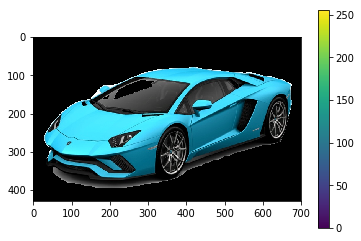

In [23]:

img=cv2.imread('car.jpg')
mask=np.zeros(img.shape[:2],np.uint8)

bgdModel=np.zeros((1,65),np.float64)
fgdModel=np.zeros((1,65),np.float64)

rect=(25,55,655,950)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
#cv2.imshow('img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img)
plt.colorbar()
plt.show()

# Corner Detection

In [12]:
img=cv2.imread('opencv-corner-detection-sample.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=np.float32(gray)

corners=cv2.goodFeaturesToTrack(gray,50,0.01,10)
corners=np.int0(corners)

for corner in corners:
    x,y=corner.ravel()
    cv2.circle(img,(x,y),3,255,-1)


cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Feature Matching

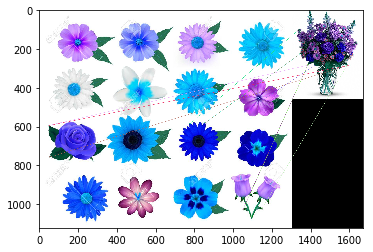

In [10]:
img1=cv2.imread('feature-matching-opencv.jpg',1)
img2=cv2.imread('feature-matching-image.jpg',1)

orb=cv2.ORB_create()

kp1,des1=orb.detectAndCompute(img1,None)
kp2,des2=orb.detectAndCompute(img2,None)

bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

matches=bf.match(des1,des2)
matches=sorted(matches,key=lambda x:x.distance)

img3=cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=2)
plt.imshow(img3)
plt.show()

# Background Reduction

In [11]:
cap=cv2.VideoCapture('people-walking.mp4')
fgbg=cv2.createBackgroundSubtractorMOG2()

while True:
    ret,frame=cap.read()
    fgmask=fgbg.apply(frame)
    
    cv2.imshow('original',frame)
    cv2.imshow('fg',fgmask)
    
    if 0xFF & cv2.waitKey(5)== ord('q'):
        break
     
cv2.destroyAllWindows()
cap.release

<function VideoCapture.release>

# Object Detection (face & eye)

In [5]:
#face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')

eye_cascade=cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')
face_cascade=cv2.CascadeClassifier('haarcascade_profileface.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,255),2)
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

     
cv2.destroyAllWindows()
cap.release

<function VideoCapture.release>